# Encoder-decoder

encoder-decoder architecture is a popular approach for sequence-to-sequence (seq2seq) tasks, such as machine translation, text summarization, and speech recognition. 

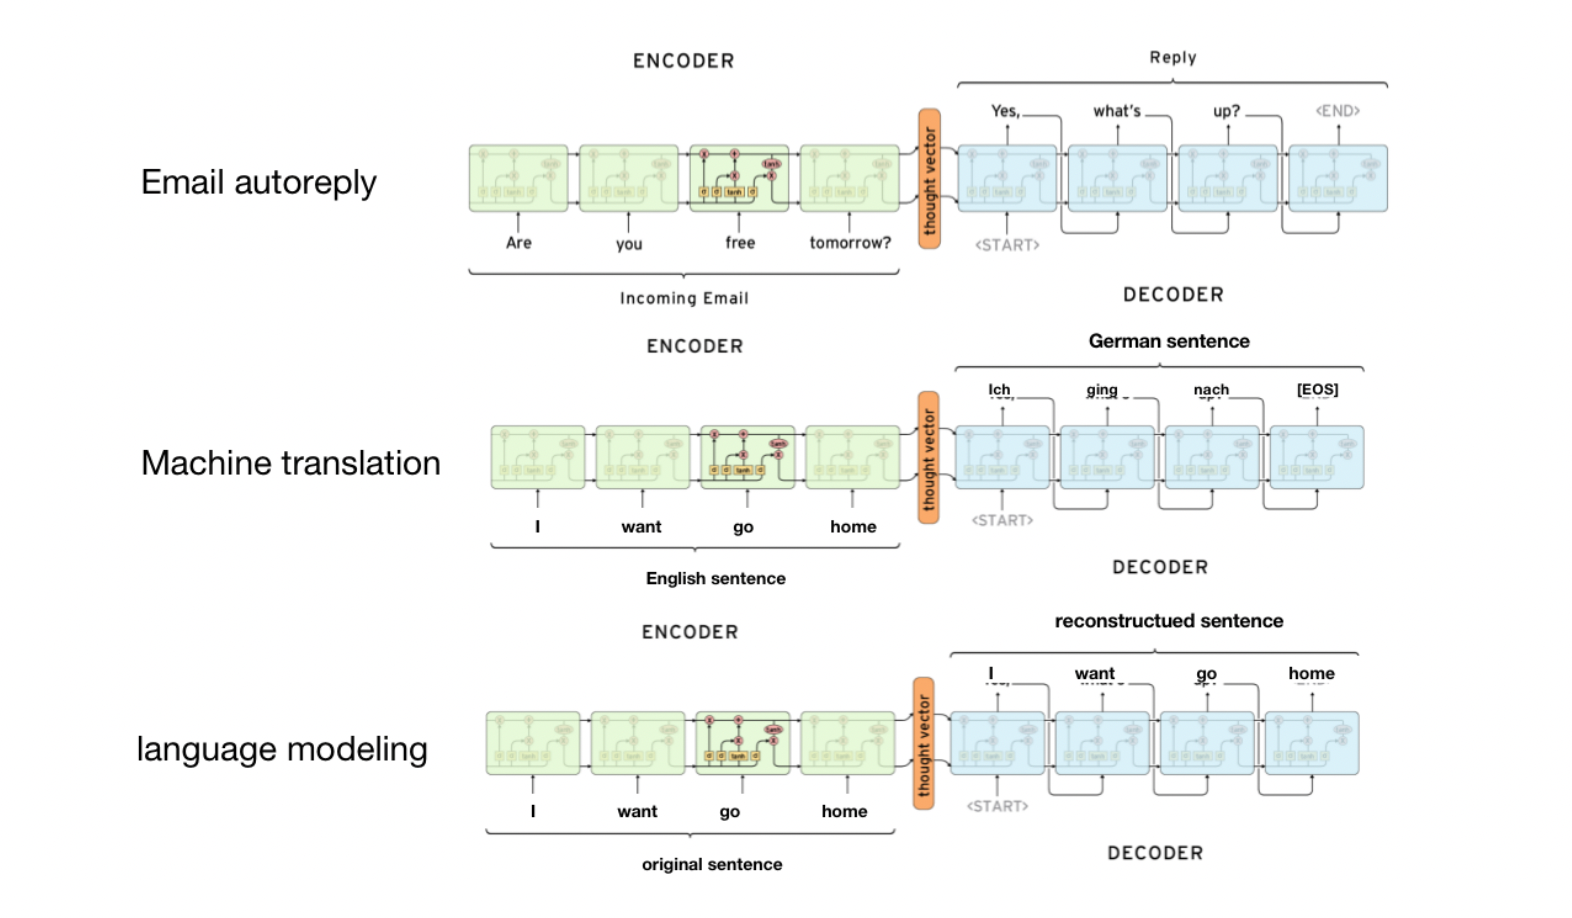

## limitation: fixed-length context vector

- **bottleneck problem**: encoder-decoder relies on a single fixed-length context vector (sequence embedding) to transfer information from the encoder to the decoder. limit the model's capacity to capture complex long-range dependencies and relationships between input and output sequences.

- Sequential processing: processes input and output sequences sequentially, resulting in slower training and inference times compared to models that can process sequences in parallel, such as the Transformer architecture.

- mistaken Alignment: In tasks like machine translation, where input and output sequences may have different lengths or require alignment between words or phrases, encoder-decoder can't make correct alignments due to the fixed-length context vector and sequential processing.

**attention mechanism and Transformer** is proposed to address these limitations.

# encoder-decoder attention

At each decoding step, the decoder attends to parts of the encoder output and retrieves an attention vector $\mathbf{a}_t$

- Compute Attention Score: 

    $$s_{i, t} = \text{score}( \mathbf{h}_{e, i}, \mathbf{h}_{d, t-1})$$

- compute Attention Weights: 

    $$\mathbf{\alpha}_t =\text{softmax}(\mathbf{s}_t)$$


- compute Attention Vector (context): weighted average of encoder hidden states:

    $$\mathbf{a}_t = \sum_{i=1}^{T} \alpha_{i, t} \mathbf{h}_{e, i}$$


- SRN with attention

    $$\mathbf{h}_t = \text{tanh}(W_{h}\mathbf{h}_{t-1} + W_{x}\mathbf{x}_{t} + W_{a}\mathbf{a}_{t}+\mathbf{b})$$

- LSTM with attention

$$
\begin{align}
f_t &= \sigma(W_{f,x} x_t + W_{f,h} h_{t-1} + W_{f,a} a_t + b_f)\\

i_t &= \sigma(W_{i,x} x_t + W_{i,h} h_{t-1} + W_{i,a} a_t + b_i)\\

o_t &= \sigma(W_{o,x} x_t + W_{o,h} h_{t-1} + W_{o,a} a_t + b_o)\\

\hat{c}_t &= \tanh(W_{c,x} x_t + W_{c,h} h_{t-1} + W_{c,a} a_t + b_c)\\

c_t &= f_t \odot c_{t-1} + i_t \odot \hat{c}_t\\

h_t &= a_t \odot c_t
\end{align}
$$


- GRU with attention

$$
\begin{align}
r_t &= \sigma(W_{r,x} x_t + W_{r,h} h_{t-1} + W_{r,a} a_t + b_r)\\

z_t &= \sigma(W_{z,x} x_t + W_{z,h} h_{t-1} + W_{z,a} a_t + b_z)\\

\hat{h}_t &= \tanh(W_{h,x} x_t + W_{h,a} a_t + b_h + r_t \odot (W_{r,h} h_{t-1} + b_{hr}))\\

h_t &= z_t \odot h_{t-1} + (1 - z_t) \odot \hat{h}_t
\end{align}
$$


### Bahdanau attention

Bahdanau Attention (also known as additive attention or concat attention):

Computes the attention scores in a more complex manner compared to Luong attention, which may help in capturing more complex relationships between input and output sequences.

- Compute Attention Score: attention score at the $i$-th input position for the $t$-th decoding step. use an MLP (2 layers, tanh activation and no softmax)

    $$s_{i, t} = \mathbf{v}^T \tanh(W_e \mathbf{h}_{e, i} + W_d \mathbf{h}_{d, t-1})$$

- compute Attention Weights by softmax: 

    $$\alpha_{i,t} = \frac{\exp(s_{i,t})}{\sum_{j=1}^{T} \exp(s_{j,t})}$$


- compute Attention Vector (context): weighted average of encoder hidden states:

    $$\mathbf{a}_t = \sum_{i=1}^{T} \alpha_{i,t} \mathbf{h}_{e, i}$$


$\mathbf{h}_{e, i}$ represents the hidden state of the encoder at position $i$.

$\mathbf{h}_{d, t-1}$ is the previous hidden state of the decoder.

$\alpha_{i,t}$ is the attention weight for the $i$-th input position at the $t$-th decoding step.

$T$ is the length of the input sequence.

### Luong attention

Luong Attention (also known as multiplicative attention or dot attention):

Offers multiple methods for calculating attention scores, including dot product, general, and concat.

1. Dot: $s_{i,t} = \langle h_{d,t}, h_{e,i} \rangle$

2. Bilinear : $s_{i,t} = \langle h_{d,t}, W h_{e,i} \rangle$

3. MLP (similar to Bahdanau): $s_{i,t} = v_a^T \tanh{(W_{e} h_{e,i}+ W_{d} h_{d,t})}$


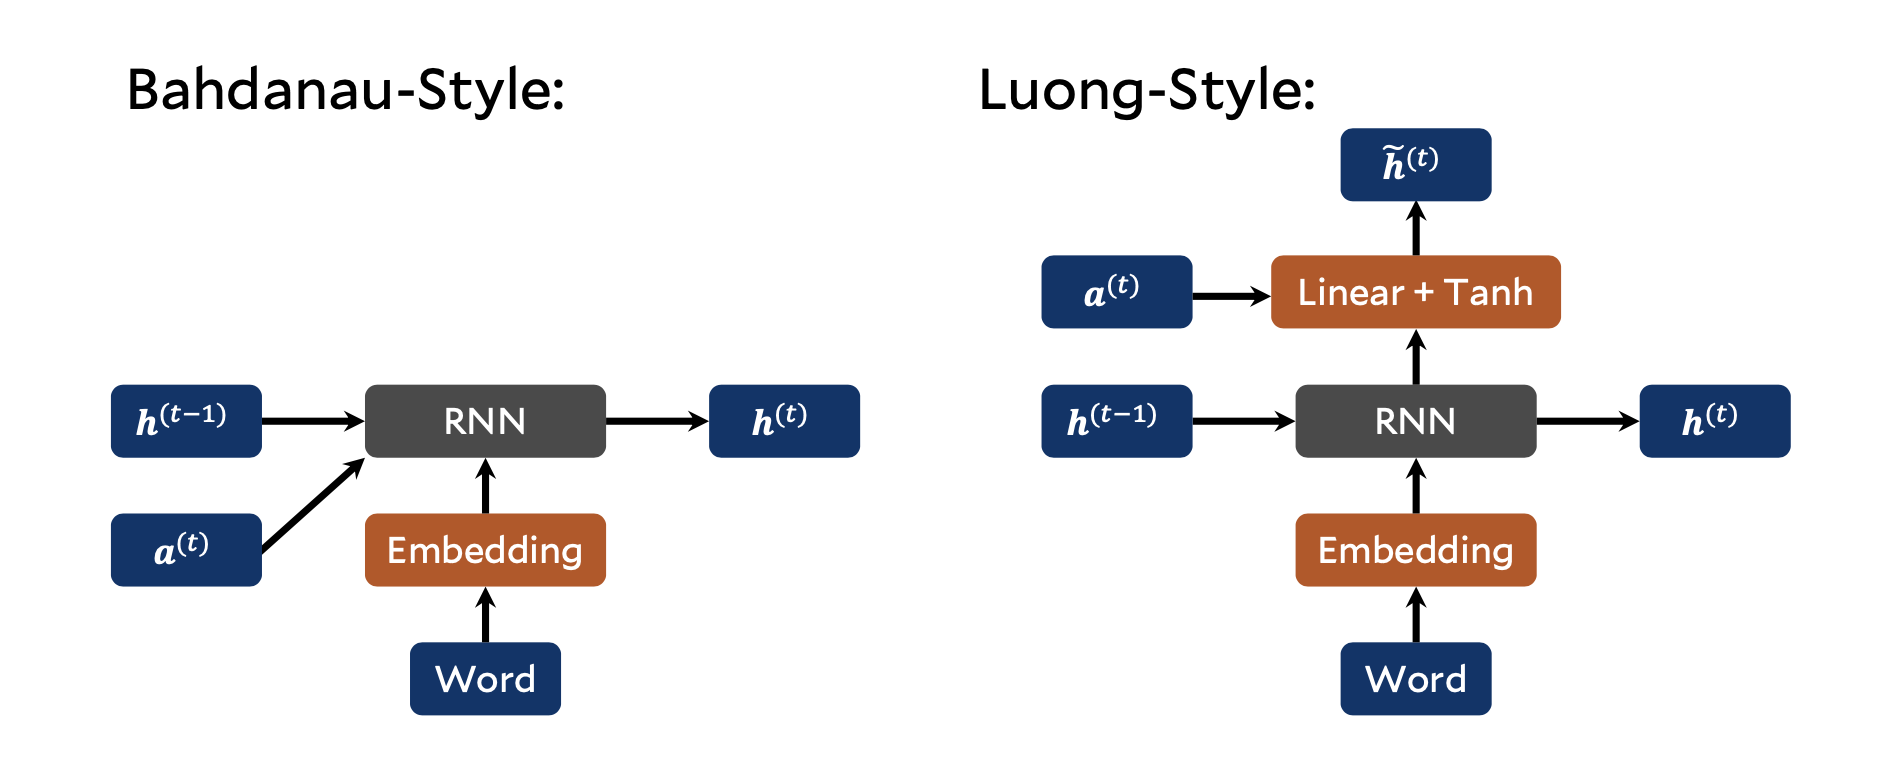